In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
# Load dataset
df = pd.read_csv("dataset/sales_data.csv", parse_dates=["Date"])

In [140]:
# Define your desired range
start_date = "2023-12-01"
end_date = "2024-11-30"

# Filter the dataset
sales_2024 = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)]

print("Filtered dataset:", sales_2024.shape)
sales_2024

Filtered dataset: (1747, 10)


,Date,Region,Product_Type,Units_Sold,Client_Type,Sales_Channel,Service_Contract,Customer_Satisfaction,Revenue,Maintenance_Cost
1610,2023-12-01,Constanța,Pallet Truck,3,Dealer,Direct,No,8,17450.83,535.71
1611,2023-12-01,Constanța,Electric Forklift,2,Corporate,Dealer,Yes,8,50719.04,2098.76
1612,2023-12-01,Cluj,Order Picker,4,Corporate,Direct,Yes,10,52052.76,3926.84
1613,2023-12-01,Constanța,Reach Truck,1,SME,Direct,Yes,7,21090.32,1241.83
1614,2023-12-02,Iași,Electric Forklift,3,Corporate,Direct,No,8,72120.19,3435.89
...,...,...,...,...,...,...,...,...,...,...
3352,2024-11-29,Constanța,Electric Forklift,3,Dealer,Dealer,Yes,10,81892.14,2485.31
3353,2024-11-29,Constanța,Electric Forklift,4,SME,Dealer,Yes,9,94774.31,6841.83
3354,2024-11-30,Constanța,Reach Truck,1,Dealer,Direct,No,10,19872.19,804.43
3355,2024-11-30,Iași,Reach Truck,4,SME,Direct,Yes,7,65621.18,4964.53


In [141]:
# Product types to include
products_to_compare = ["Pallet Truck", "Order Picker", "Electric Forklift"]

# Filter dataset
df_filtered = sales_2024[sales_2024["Product_Type"].isin(products_to_compare)].copy()

In [142]:
# Function to map month → season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

In [143]:
# Add Season column
df_filtered["Season"] = df_filtered["Date"].dt.month.apply(get_season)

# Aggregate totals per product and season
season_totals = (
    df_filtered.groupby(["Season", "Product_Type"])["Units_Sold"]
    .sum()
    .unstack()
    .reindex(["Winter", "Spring", "Summer", "Autumn"])  # ensure correct order
)

In [144]:
print(season_totals)

Product_Type  Electric Forklift  Order Picker  Pallet Truck
Season                                                     
Winter                      319           325           322
Spring                      298           311           378
Summer                      312           324           360
Autumn                      355           326           351


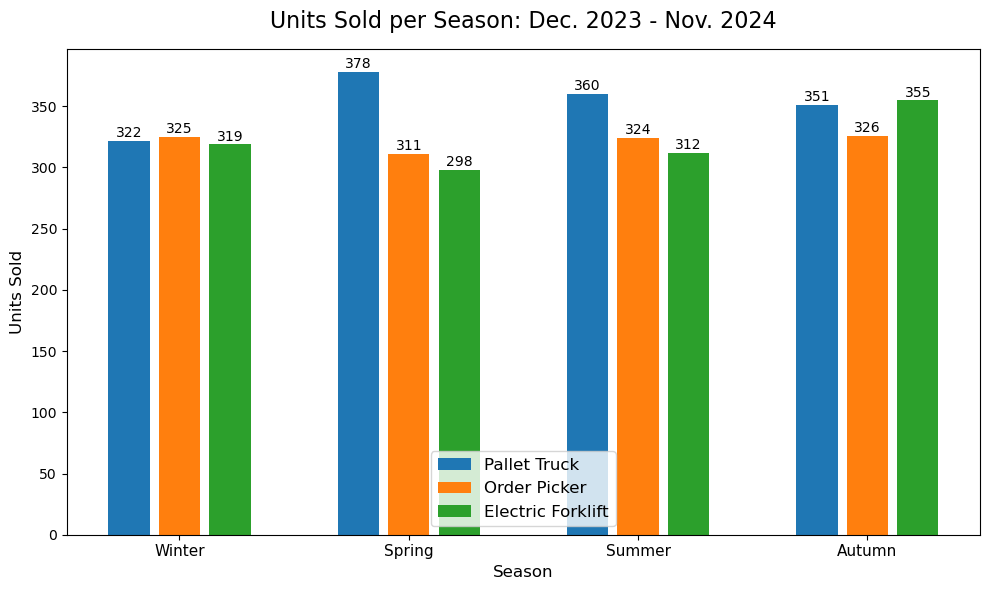

In [ ]:
# Chart
plt.figure(figsize=(10, 6))
x = np.arange(len(season_totals.index))
width = 0.18
offset = 0.22

# Rounded bars use the 'linewidth' + edgecolor trick
bars1 = plt.bar(x - offset, season_totals["Pallet Truck"], width, label="Pallet Truck")
bars2 = plt.bar(x,           season_totals["Order Picker"], width, label="Order Picker")
bars3 = plt.bar(x + offset, season_totals["Electric Forklift"], width, label="Electric Forklift")

# --- Make bars rounded ---
# for bars in [bars1, bars2, bars3]:
#     for bar in bars:
#         bar.set_linewidth(2)
#         bar.set_edgecolor("white")    # creates a rounded visual
#         bar.set_alpha(0.9)


# --- Styled title & fonts ---
plt.title(
    "Units Sold per Season: Dec. 2023 - Nov. 2024",
    fontsize=16,
    # fontweight="bold",
    pad=15
)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)

plt.xticks(x, season_totals.index, fontsize=11)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)
plt.tight_layout()

# --- Add value labels on each bar ---
for bar_group in [bars1, bars2, bars3]:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            str(int(height)),
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.show()